# Карты и геоданные

Карты и геоданные (данные о географическом местоположении) использовались человеком с древних времен и в самых разных областях:
* для перемещений на транспорте - на самолетах, на кораблях, на поездах, в автомобилях
* для путешествий
* для поиска и добычи полезных ископаемых
* в строительстве
* для развития бизнеса
* для прогнозов погоды
* в сельском хозяйстве
* в археологии и других самых разных областях.

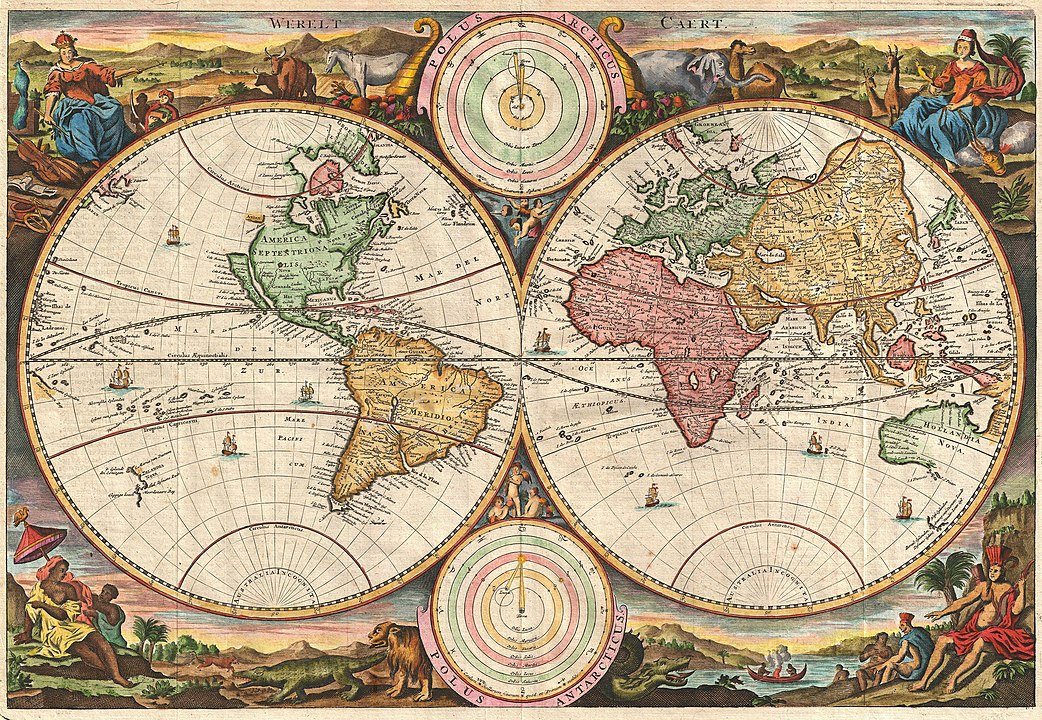

# Библиотека Folium

Библиотека Folium позволяет создавать и отображать интерактивные карты.

Подключим библиотеку Folium, некоторые ее модули и функции, которые потребуются в работе, с помощью инструкции import.

In [1]:
import folium
from folium import Map, Figure, LatLngPopup, Marker, ClickForMarker, Circle, CircleMarker, PolyLine, plugins

## Функция Map и основные параметры карты

Функция Map() создает карту, которую можно вывести на экран.

In [2]:
m = Map()
m

У функции Map() много различных параметров, для которых определены начальные значения по умолчанию.

Если необходимо, можно указать собственные значения, например, для следующих параметров:

* location - кооординаты центра карты в формате [широта, долгота]
* tiles - тип изображения карты, значение по умолчанию = 'OpenStreetMap'
* zoom_start - начальный уровень увеличения.

In [3]:
# Координаты государства Сингапур
loc = [1.35, 103.8]
tiles = "Stamen Terrain"
zoom = 11

# s_map = Map(location = loc, tiles = tiles, zoom_start = zoom)
s_map = Map(location = loc, zoom_start = zoom)
s_map

## Функция Figure

С помощью функции Figure() можно задать размеры картинки для вывода на экран.

На эту картинку методом add_child() выводится карта, созданная с помощью функции Map().

In [6]:
s_map = Map(location=[1.35, 103.8], zoom_start=11)

w = 1000
h = 600

fig = Figure(width=w, height=h)
fig.add_child(s_map)

## zoom_start: выбор начального увеличения

In [7]:
zoom = 8

s_map = Map(location=[1.35, 103.8], zoom_start=zoom)

fig = Figure(width=1000, height=600)
fig.add_child(s_map)

## tiles: выбор разных типов изображений карт

В библиотеке Folium можно выбирать разные типы изображений карт - tiles.

Некоторыми из tiles можно пользоваться сразу же, а для некоторых нужно будет указать API keys для подключения.

Перечень tiles, которыми можно пользоваться сразу, без API keys:
* OpenStreetMap
* CartoDB dark_matter
* CartoDB Positron

In [8]:
tiles = 'OpenStreetMap'

s_map = Map(location=[1.35, 103.8], tiles = tiles, zoom_start=11)

fig = Figure(width=1000, height=600)
fig.add_child(s_map)

In [11]:
tiles = 'CartoDB dark_matter'

s_map = folium.Map(location=[1.35, 103.8], tiles = tiles, zoom_start=11)

fig = Figure(width=1000, height=600)
fig.add_child(s_map)

In [12]:
tiles = 'CartoDB Positron'

s_map = folium.Map(location=[1.35, 103.8], tiles = tiles, zoom_start=11)

fig = Figure(width=1000, height=600)
fig.add_child(s_map)

## location: выбор начальных координат

Широта — угол φ между местным направлением зенита и плоскостью экватора,

отсчитываемый от 0° до 90° в обе стороны от экватора.

Долгота — двугранный угол λ между плоскостью меридиана, проходящего через данную точку, и плоскостью начального нулевого меридиана, от которого ведётся отсчёт долготы.

Долготу от 0° до 180° к востоку от нулевого меридиана называют восточной, к западу — западной.

Восточные долготы принято считать положительными, западные — отрицательными.

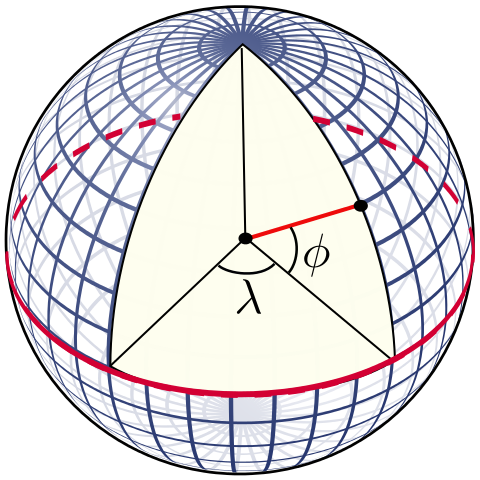

Выберем нужные координаты и построим карту для города Москва.

In [13]:
loc = [55.75, 37.7]

moscow_map = Map(location=loc, tiles='OpenStreetMap', zoom_start=9)

fig = Figure(width=1000, height=600)
fig.add_child(moscow_map)

## Указатели координат

С помощью функции LatLngPopup() можно получить координаты любой точки на карте.

Нужно кликнуть мышкой в нужное место на карте - и отобразится указатель с координатами этого места.

In [14]:
loc = [55.75, 37.7]

moscow_map = Map(location=loc, tiles='OpenStreetMap', zoom_start=9)

moscow_map.add_child(LatLngPopup())

fig = Figure(width=1000, height=600)
fig.add_child(moscow_map)

## Маркеры

На картах можно ставить разные маркеры, при этом нужно задать координаты места, где ставится маркер.

Также можно задавать и другие параметры маркера, например:
* popup - надпись, которая появляется после нажатия на маркер  
* icon - вид маркера
* tooltip - надпись, которая появляется, если курсор проходит над маркером.

Маркеры добавляются на карту с помощью метода add_to().

In [18]:
fig = Figure(width=1000, height=600)

m = Map(location=[55.75, 37.7], tiles='OpenStreetMap', zoom_start=9)

balashikha = (55.8, 37.9)
zelenograd = (56, 37.2)

Marker(balashikha, popup='Балашиха').add_to(m)
Marker(zelenograd, popup='Зеленоград').add_to(m)

fig.add_child(m)

В параметре icon можно задать цвет и вид изображения маркера.

In [19]:
fig = Figure(width=1000, height=600)

m = Map(location=[55.75, 37.7], tiles='OpenStreetMap', zoom_start=9)

balashikha = (55.8, 37.9)
zelenograd = (56, 37.2)

Marker(balashikha, popup='Балашиха',
              icon=folium.Icon(
                  color='darkred', icon='crosshairs', prefix='fa')
             ).add_to(m)
Marker(zelenograd, popup='Зеленоград',
              icon=folium.Icon(color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)

fig.add_child(m)

С помощью параметра tooltip можно задать текст, который будет появляться, когда над маркером проходит курсор.

In [20]:
fig = Figure(width=1000, height=600)

m = Map(location=[55.75, 37.7], tiles='OpenStreetMap', zoom_start=9)

balashikha = (55.8, 37.9)
zelenograd = (56, 37.2)

tooltip_1 = 'Город Балашиха'
tooltip_2 = 'Город Зеленоград'

Marker(balashikha, tooltip = tooltip_1,
              icon=folium.Icon(
                  color='darkred', icon='crosshairs', prefix='fa')
             ).add_to(m)
Marker(zelenograd, tooltip = tooltip_2,
              icon=folium.Icon(color='green', icon='crosshairs', prefix='fa')
             ).add_to(m)

fig.add_child(m)

## Создание новых маркеров по клику

С помощью функции ClickForMarker() можно создавать новые маркеры и потом размещать их на карте.

Для создания нового маркера нужно кликнуть по маркеру, который изначально был помещен на карту,

а потом перетащить появившийся новый маркер в нужное место.

При этом можно создать любое количество новых маркеров.

In [21]:
fig = Figure(width=1000, height=600)

loc = [55.75, 37.7]

m = Map(location=loc, tiles='OpenStreetMap', zoom_start=9)

tooltip = 'Москва'

Marker(loc, tooltip = tooltip,
              icon=folium.Icon(
                  color='darkred', icon='crosshairs', prefix='fa')
             ).add_to(m)

newMarker = ClickForMarker(popup="Новый маркер")

m.add_child(newMarker)

fig.add_child(m)

## Маркеры-круги

С помощью функций Circle() и CircleMarker() можно также создавать маркеры в виде кругов.

При этом при изменении масштаба карты:
* размер маркера, созданного функцией Circle(), будет изменяться в соответствии с масштабом
* размер маркера, созданного функцией CircleMarker(), будет оставаться неизменным.

В функциях Circle() и CircleMarker() можно использовать следующие параметры:
* location - кортеж из координат долготы и широты
* radius - в Circle() указывается в метрах, а в CircleMarker() указывается в пикселях
* popup - надпись, которая появляется при нажатии на маркер
* tooltip - надапись, которая появляется, когда курсор проходит над маркером
* color - цвет маркера
* fill - нужно ли закрашивать маркер внутри (True или False).

Маркеры-круги добавляются на карту с помощью метода add_to().

In [22]:
fig = Figure(width=1000, height=600)

m = Map(location=[55.75, 37.7], tiles='OpenStreetMap', zoom_start=9)

balashikha = (55.8, 37.9)
zelenograd = (56, 37.2)

tooltip_1 = 'Балашиха'
tooltip_2 = 'Зеленоград'

Circle(
    radius=6000,
    location=balashikha,
    tooltip=tooltip_1,
    color="darkred",
    fill=True,
).add_to(m)

CircleMarker(
    location=zelenograd,
    radius=40,
    tooltip=tooltip_2,
    color="green",
    fill=False,
).add_to(m)

fig.add_child(m)

## Ломаные линии на карте

С помощью функции Polyline() на картах можно рисовать ломаные линии, состоящие из отрезков с заданными координатами.

При этом ломаные линии могут быть и замкнутыми.

В функции Polyline() можно задать следующие параметры:
* locations - список координат точек, которые будут соединены линиями
* popup - надпись, которая появляется при нажатии на маркер
* tooltip - надапись, которая появляется, когда курсор проходит над маркером
* color - цвет линии
* weight - толщина линий в пикселях.

Ломаные линии добавляются на карту с помощью метода add_to().

In [23]:
loc = [55.75, 37.7]

m = Map(location=loc, tiles='OpenStreetMap', zoom_start=9)

m.add_child(folium.LatLngPopup())

coordinates = [
    (56, 37.18),
    (55.73, 37),
    (55.65, 37.3),
    (55.74, 37.61),
    (55.94, 37.375),
    (56, 37.18),
]

route = 'Маршрут поездки'

PolyLine(coordinates, tooltip = route, weight=3, color='#008B8B', line_opacity = 0.1).add_to(m)

fig = Figure(width=1000, height=600)
fig.add_child(m)

## Мини-карта

С помощью функции MiniMap() из модуля plugins на карту можно добавлять вставку с другой картой.

При этом можно добавлять сразу несколько карт-вставок.

В функции MiniMap() можно указать следующие параметры:
* position - в какой части основной карты нужно разместить вставку, по умолчанию 'bottomright' (нижний правый угол)
* width - ширина вставки в пикселях
* height - высота вставки в пикселях
* zoom_level_offset - уровень масштаба вставки относительно основной карты (может быть как отрицательной, так и положительной величиной).

In [24]:
loc = [55.75, 37.7]
m = Map(location=loc, tiles='OpenStreetMap', zoom_start=9)

zoom_offset_1 = -8
minimap_1 = plugins.MiniMap(position = 'bottomright', zoom_level_offset=zoom_offset_1, width=200, height=200)
m.add_child(minimap_1)

zoom_offset_2 = -7
minimap_2 = plugins.MiniMap(position = 'topright', zoom_level_offset=zoom_offset_2, width=200, height=200)
m.add_child(minimap_2)

fig = Figure(width=1000, height=600)
fig.add_child(m)

## Сохранение карты в HTML-файл

С помощью функции save() созданную карту можно сохранить в html-файл.

In [25]:
m.save('moscow_map.html')

# Упражнение

1. Задать правильные координаты острова Пасхи (остров Рапануи) для построения карты.
2. Построить карту острова Пасхи, выбрав тип карты tiles и указав zoom_start = 12.
3. Добавить на основную карту MiniMap вставку в правом нижне углу.
4. Вывести основную карту с мини-вставкой на экран.
5. Сохранить полученную карту в файл формата HTML.

In [50]:
import folium
from folium import Map, Figure, plugins

In [51]:
loc = [-27.12, -109.35]

rapanui_map = Map(location=loc, tiles='OpenStreetMap', zoom_start=12)

zoom_offset_1 = -11
minimap_1 = plugins.MiniMap(position = 'bottomright', zoom_level_offset=zoom_offset_1, width=250, height=250)
rapanui_map.add_child(minimap_1)

fig = Figure(width=1000, height=600)
fig.add_child(rapanui_map)

In [52]:
rapanui_map.save('rapanui_map.html')